<a href="https://colab.research.google.com/github/ghanaram/data-analyst-project/blob/main/Play_Store_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Exploration:

In [30]:
import pandas as pd;
df = pd.read_csv('Training_Data_Google_Play_reviews_6000.csv');

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              6000 non-null   object
 1   userName              6000 non-null   object
 2   userImage             6000 non-null   object
 3   content               6000 non-null   object
 4   score                 6000 non-null   int64 
 5   thumbsUpCount         6000 non-null   int64 
 6   reviewCreatedVersion  4396 non-null   object
 7   at                    6000 non-null   object
 8   replyContent          191 non-null    object
 9   repliedAt             191 non-null    object
 10  appVersion            4396 non-null   object
 11  userLang              6000 non-null   object
 12  app_id                6000 non-null   object
dtypes: int64(2), object(11)
memory usage: 609.5+ KB
None


In [ ]:
print(df.head())

                               reviewId           userName  \
0  495266a4-f451-48c3-a844-fb3c07560d55     Foysal Hossain   
1  947fcd83-7a28-403d-b03b-d0bc20f52e0e          S K VERMA   
2  65856211-67ba-4560-84dd-a0055775ed90      Amanuel Abara   
3  cd5ba250-3a26-43b4-a378-77d18f73a503  Vagarangas X Aopi   
4  e8e886b4-d6c6-416b-b0a1-be90320c4024       Shafin islam   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a-/ALV-U...   
1  https://play-lh.googleusercontent.com/a/ACg8oc...   
2  https://play-lh.googleusercontent.com/a/ACg8oc...   
3  https://play-lh.googleusercontent.com/a/ACg8oc...   
4  https://play-lh.googleusercontent.com/a-/ALV-U...   

                      content  score  thumbsUpCount reviewCreatedVersion  \
0  Gett van for no reason 😂😂😂      1              0                  NaN   
1       better' than WhatsApp      4              0                  NaN   
2    That was good app for me      5              0           

In [ ]:
print(df.columns)

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion', 'userLang', 'app_id'],
      dtype='object')


In [ ]:
print(df.isnull().sum())

reviewId                   0
userName                   0
userImage                  0
content                    0
score                      0
thumbsUpCount              0
reviewCreatedVersion    1604
at                         0
replyContent            5809
repliedAt               5809
appVersion              1604
userLang                   0
app_id                     0
dtype: int64


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
# Handle missing values (e.g., fill with median, mode, or drop columns/rows)
# For example, to fill missing values in 'reviewCreatedVersion' column with mode
mode_version = df['reviewCreatedVersion'].mode()[0]
df['reviewCreatedVersion'].fillna(mode_version, inplace=True)

In [ ]:
# Check the data types of columns
print(df.dtypes)

reviewId                object
userName                object
userImage               object
content                 object
score                    int64
thumbsUpCount            int64
reviewCreatedVersion    object
at                      object
replyContent            object
repliedAt               object
appVersion              object
userLang                object
app_id                  object
dtype: object


**Descriptive Analysis:**

In [ ]:
# Compute descriptive statistics
import matplotlib.pyplot as plt

print(df.describe())

             score  thumbsUpCount
count  6000.000000    6000.000000
mean      3.297167       6.993667
std       1.778122     232.865931
min       1.000000       0.000000
25%       1.000000       0.000000
50%       4.000000       0.000000
75%       5.000000       0.000000
max       5.000000   14491.000000


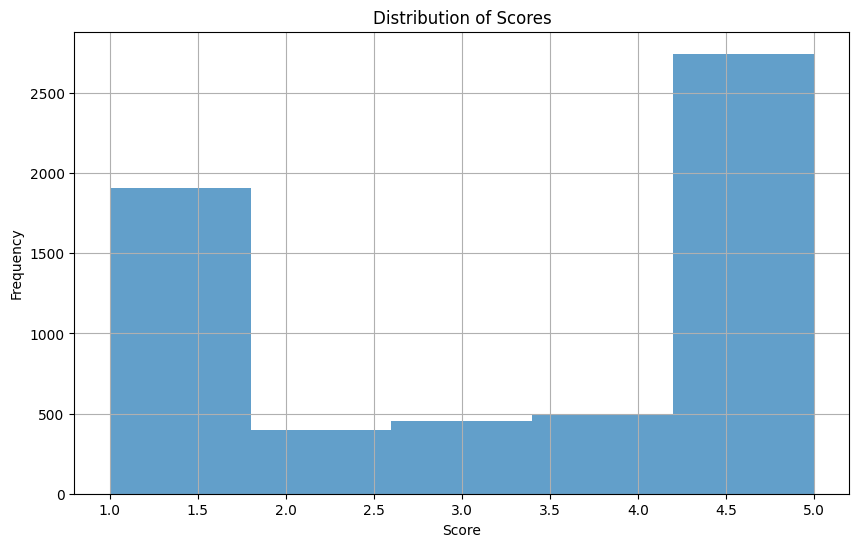

In [ ]:
# Visualizations
plt.figure(figsize=(10, 6))
df['score'].hist(bins=5, alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Scores')
plt.show()

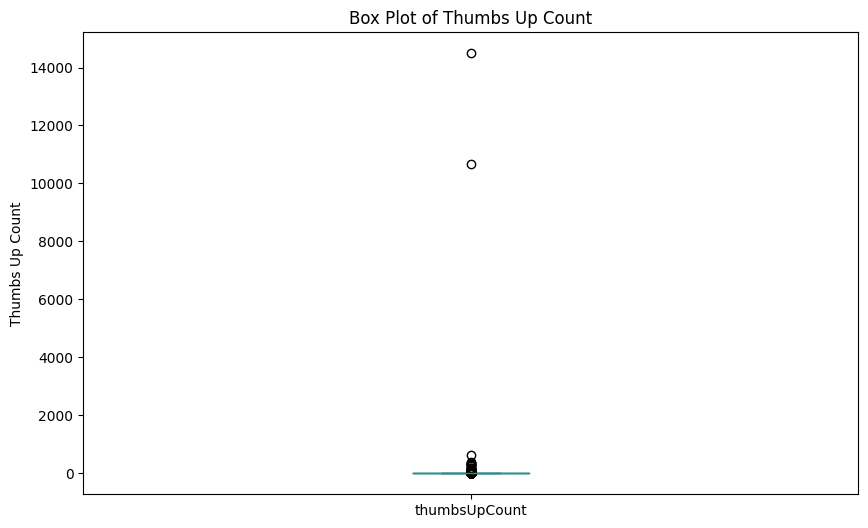

In [ ]:
plt.figure(figsize=(10, 6))
df['thumbsUpCount'].plot(kind='box')
plt.ylabel('Thumbs Up Count')
plt.title('Box Plot of Thumbs Up Count')
plt.show()

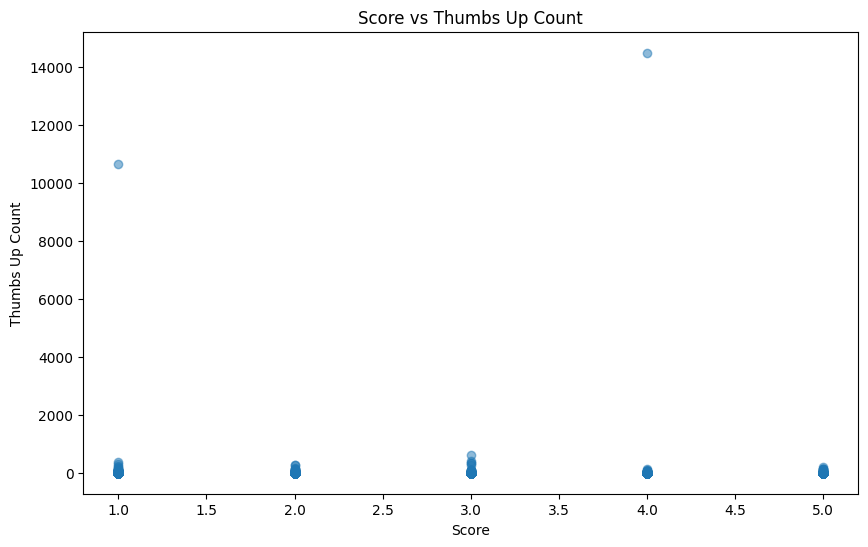

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['score'], df['thumbsUpCount'], alpha=0.5)
plt.xlabel('Score')
plt.ylabel('Thumbs Up Count')
plt.title('Score vs Thumbs Up Count')
plt.show()

In [ ]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

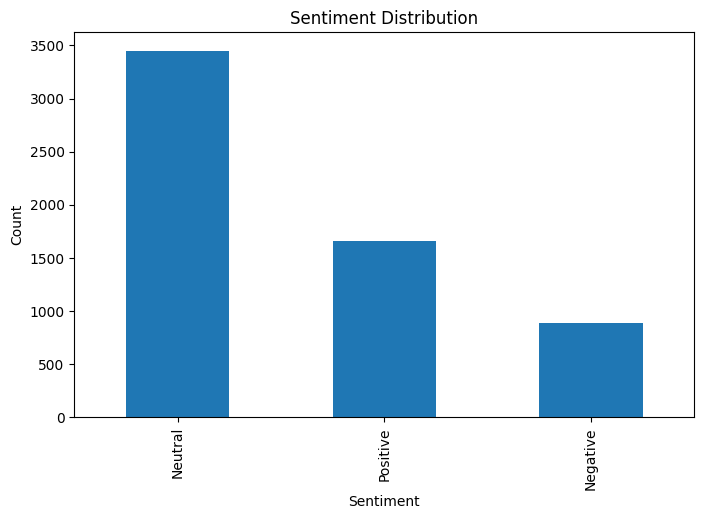

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment_score(text):
    return sid.polarity_scores(text)['compound']

# Apply sentiment analysis to 'content' column
df['sentiment_score'] = df['content'].apply(get_sentiment_score)

# Classify sentiment based on score
df['sentiment'] = df['sentiment_score'].apply(lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral'))

# Visualize sentiment distribution
plt.figure(figsize=(8, 5))
df['sentiment'].value_counts().plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()


In [ ]:
print(df.columns)

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion', 'userLang', 'app_id', 'sentiment_score',
       'sentiment'],
      dtype='object')


Top-rated app categories based on average ratings:
app_id
com.viber.voip            3.928
com.snapchat.android      3.525
org.telegram.messenger    3.505
com.facebook.orca         3.246
com.whatsapp              3.203
Name: score, dtype: float64


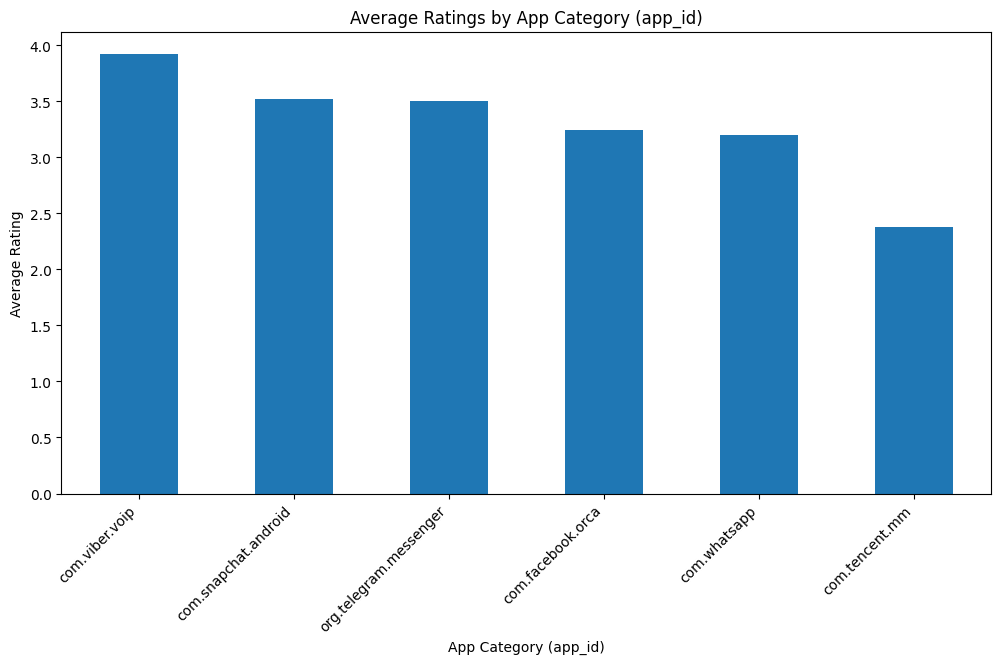

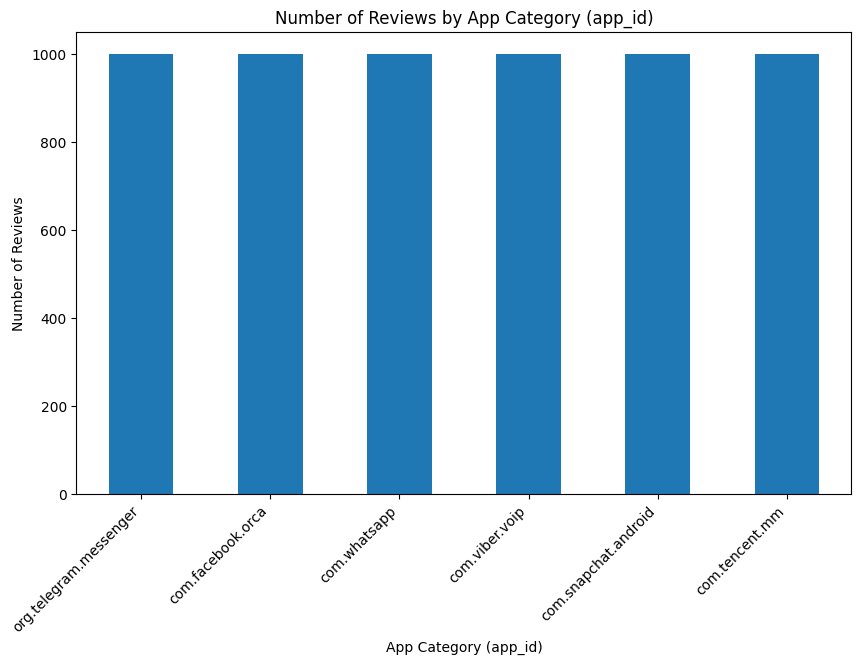

In [ ]:
# Perform App Categories Analysis using 'app_id'
category_ratings = df.groupby('app_id')['score'].mean().sort_values(ascending=False)
category_counts = df['app_id'].value_counts()

# Top-rated app categories based on average ratings
top_categories = category_ratings.head(5)
print("Top-rated app categories based on average ratings:")
print(top_categories)

# Distribution of ratings across different app categories
plt.figure(figsize=(12, 6))
category_ratings.plot(kind='bar')
plt.xlabel('App Category (app_id)')
plt.ylabel('Average Rating')
plt.title('Average Ratings by App Category (app_id)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Insights into popular and less popular app categories among users
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.xlabel('App Category (app_id)')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews by App Category (app_id)')
plt.xticks(rotation=45, ha='right')
plt.show()

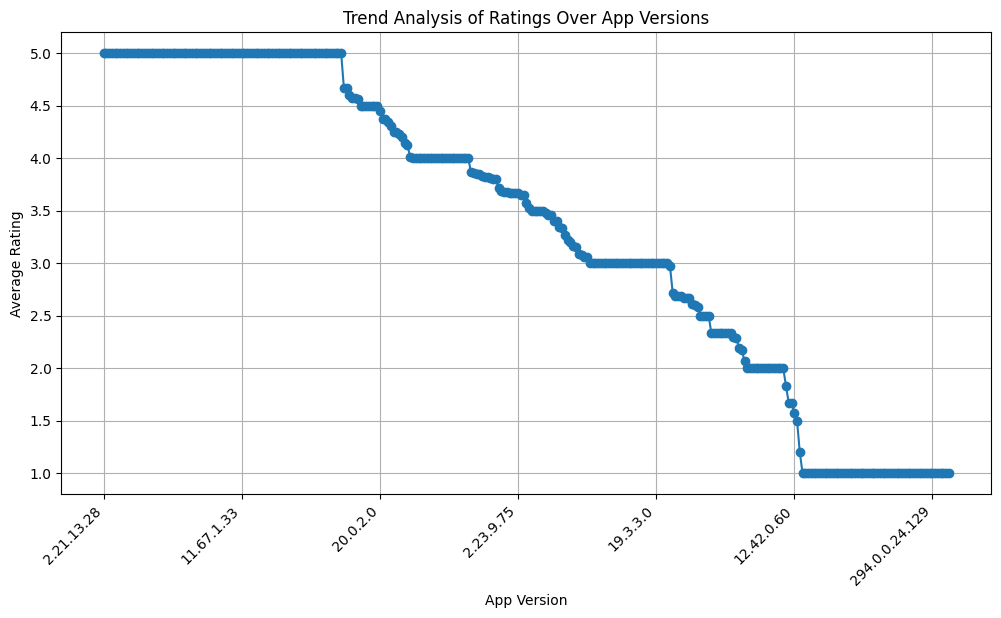

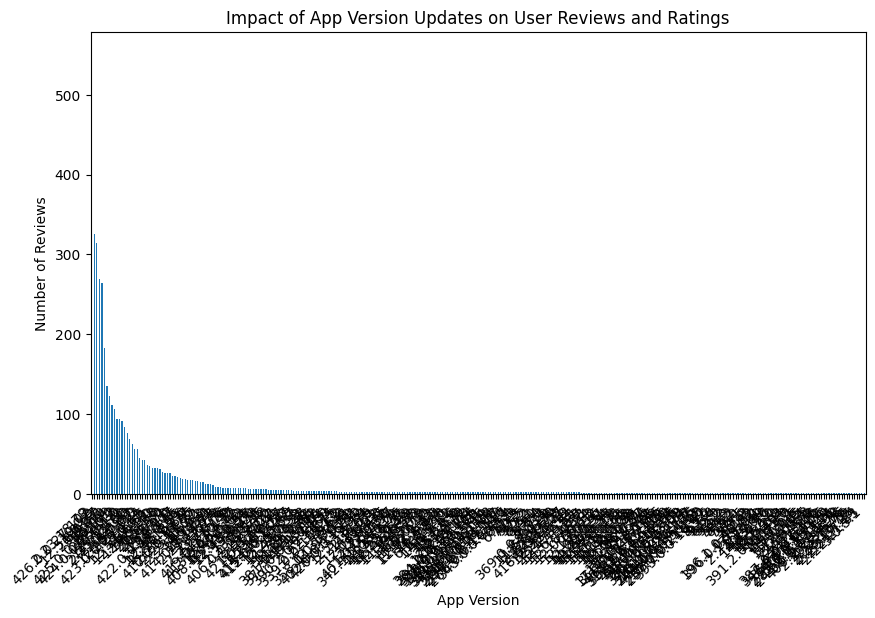

Top-rated app versions based on average ratings:
appVersion
2.21.13.28        5.0
403.1.0.17.106    5.0
369.0.0.7.111     5.0
Name: score, dtype: float64


In [ ]:
# Perform App Versions Analysis
version_ratings = df.groupby('appVersion')['score'].mean().sort_values(ascending=False)
version_counts = df['appVersion'].value_counts()

# Trend analysis of ratings over different app versions
plt.figure(figsize=(12, 6))
version_ratings.plot(kind='line', marker='o')
plt.xlabel('App Version')
plt.ylabel('Average Rating')
plt.title('Trend Analysis of Ratings Over App Versions')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

# Impact of app version updates on user reviews and ratings
plt.figure(figsize=(10, 6))
version_counts.plot(kind='bar')
plt.xlabel('App Version')
plt.ylabel('Number of Reviews')
plt.title('Impact of App Version Updates on User Reviews and Ratings')
plt.xticks(rotation=45, ha='right')
plt.show()

# Identification of successful app versions and areas for improvement
successful_versions = version_ratings.head(3)
print("Top-rated app versions based on average ratings:")
print(successful_versions)

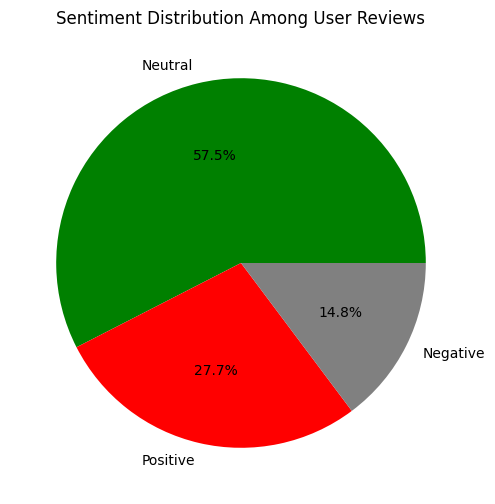

Examples of Key Sentiments Expressed by Users Across App Categories:
                   app_id sentiment
0       com.facebook.orca   Neutral
1    com.snapchat.android   Neutral
2          com.tencent.mm   Neutral
3          com.viber.voip   Neutral
4            com.whatsapp   Neutral
5  org.telegram.messenger   Neutral


In [ ]:

# Perform Sentiment Analysis
sid = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['content'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Categorize sentiments based on scores
df['sentiment'] = df['sentiment_score'].apply(lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral'))

# Sentiment distribution among user reviews (positive, negative, neutral)
sentiment_counts = df['sentiment'].value_counts()

# Percentage breakdown of positive, negative, and neutral sentiments
sentiment_percentages = (sentiment_counts / sentiment_counts.sum()) * 100

# Plotting sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_percentages.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red', 'gray'])
plt.title('Sentiment Distribution Among User Reviews')
plt.ylabel('')
plt.show()

# Examples of key sentiments expressed by users across app categories
example_sentiments = df.groupby('app_id')['sentiment'].apply(lambda x: x.value_counts().idxmax()).reset_index()
print("Examples of Key Sentiments Expressed by Users Across App Categories:")
print(example_sentiments)

In [ ]:
print(df.columns)

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion', 'userLang', 'app_id', 'sentiment_score',
       'sentiment'],
      dtype='object')


**Actionable Insights and Recommendations:**

In [ ]:
category_avg_ratings = df.groupby('app_id')['score'].mean().sort_values(ascending=False)

# Identify top-rated and lower-rated categories
top_rated_categories = category_avg_ratings.head(3)  # Change the number as needed
lower_rated_categories = category_avg_ratings.tail(3)  # Change the number as needed

# Category-Specific Recommendations
def generate_recommendations(category, avg_rating):
    if avg_rating >= 4.5:
        return f"For {category} (Top-rated Category - Average Rating: {avg_rating:.2f}):\n" \
               "- Focus on maintaining high-quality app features and functionalities.\n" \
               "- Regularly update the app with new features based on user feedback.\n" \
               "- Engage with users through prompt customer support and address their concerns effectively.\n"
    else:
        return f"For {category} (Lower-rated Category - Average Rating: {avg_rating:.2f}):\n" \
               "- Conduct thorough user experience (UX) testing to identify and address usability issues.\n" \
               "- Optimize app performance and speed to enhance user satisfaction.\n" \
               "- Implement user-friendly interfaces and intuitive navigation to improve user engagement.\n"

# Print recommendations and improvement suggestions
for category, avg_rating in top_rated_categories.items():
    print(generate_recommendations(category, avg_rating))

for category, avg_rating in lower_rated_categories.items():
    print(generate_recommendations(category, avg_rating))

For com.viber.voip (Lower-rated Category - Average Rating: 3.93):
- Conduct thorough user experience (UX) testing to identify and address usability issues.
- Optimize app performance and speed to enhance user satisfaction.
- Implement user-friendly interfaces and intuitive navigation to improve user engagement.

For com.snapchat.android (Lower-rated Category - Average Rating: 3.52):
- Conduct thorough user experience (UX) testing to identify and address usability issues.
- Optimize app performance and speed to enhance user satisfaction.
- Implement user-friendly interfaces and intuitive navigation to improve user engagement.

For org.telegram.messenger (Lower-rated Category - Average Rating: 3.50):
- Conduct thorough user experience (UX) testing to identify and address usability issues.
- Optimize app performance and speed to enhance user satisfaction.
- Implement user-friendly interfaces and intuitive navigation to improve user engagement.

For com.facebook.orca (Lower-rated Category 

**App Version Recommendations:**



In [ ]:
# Perform Sentiment Analysis
sid = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['content'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Guidelines for App Version Updates based on User Feedback and Sentiment Analysis
def app_version_recommendations(app_version):
    version_reviews = df[df['appVersion'] == app_version]
    average_sentiment = version_reviews['sentiment_score'].mean()
    if average_sentiment >= 0.1:  # Positive sentiment
        return f"App version {app_version}: Maintain current features, focus on enhancing user experience."
    elif average_sentiment <= -0.1:  # Negative sentiment
        return f"App version {app_version}: Address common issues and bugs, prioritize stability and performance improvements."
    else:  # Neutral sentiment
        return f"App version {app_version}: Consider user suggestions for minor updates and optimizations."

# Strategies for Addressing Common Issues and Bugs in Specific App Versions
def address_issues(app_version):
    version_issues = df[(df['appVersion'] == app_version) & (df['sentiment_score'] < -0.1)]
    if not version_issues.empty:
        common_issues = version_issues['content'].tolist()
        return f"Common issues and bugs in app version {app_version}:\n" + '\n'.join(common_issues)
    else:
        return f"No common issues and bugs reported for app version {app_version}."

# Print app version recommendations and strategies for addressing issues
target_versions = ['1.0', '2.0', '3.0']  # List of specific app versions to analyze
for version in target_versions:
    print(app_version_recommendations(version))
    print(address_issues(version))
    print()  # Print a blank line for readability

App version 1.0: Consider user suggestions for minor updates and optimizations.
No common issues and bugs reported for app version 1.0.

App version 2.0: Consider user suggestions for minor updates and optimizations.
No common issues and bugs reported for app version 2.0.

App version 3.0: Consider user suggestions for minor updates and optimizations.
No common issues and bugs reported for app version 3.0.

